In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy import special
import scipy
import warnings
sns.set_style('darkgrid')
warnings.filterwarnings(action='ignore')

In [2]:
train, test = pd.read_csv('train.csv'), pd.read_csv('test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
test_idx = test.Id
train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)

## EDA

### 1. Univariate search

In [6]:
# 수치형 변수와 문자형 변수 확인
num_vars = train._get_numeric_data().columns
obj_vars = set(train.columns) - set(num_vars)

In [137]:
# 명목형 변수
nominal_vars = [
    'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
    'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
    'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
    'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 
    'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'MiscFeature', 
    'MoSold', 'YrSold', 'SaleType', 'SaleCondition'
]

In [8]:
# 순위형 변수
ranking_vars = [
    'OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual',
    'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 
]

In [138]:
# 연속형 변수
continue_vars = [
    'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
    'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
    'BsmtHalfBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'BedroomAbvGr', 'KitchenAbvGr',
    'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'GarageYrBlt', 'YearBuilt', 'YearRemodAdd'
]

In [11]:
X_total = pd.concat((train, test)).drop(['SalePrice'], axis=1)

In [12]:
X_total[continue_vars].describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,2433.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,69.305795,10168.114080,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,...,0.597122,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968
std,23.344905,7886.996359,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,...,0.646129,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,59.000000,7478.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,...,0.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68.000000,9453.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,...,1.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,80.000000,11570.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,...,1.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,...,4.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000


In [120]:
skews, kurt, missing = {}, {}, {}
for i, c in enumerate(continue_vars):
    skews[c] = X_total[c].skew()
    kurt[c] = X_total[c].kurt()
    missing[c] = X_total[c].isnull().sum()
continue_table = pd.DataFrame([skews, kurt, missing], index=['skew', 'kurt', 'missing']).T
continue_table

,skew,kurt,missing
LotFrontage,1.503278,11.295921,486.0
LotArea,12.829025,264.952310,0.0
MasVnrArea,2.602589,9.254343,23.0
BsmtFinSF1,1.425722,6.904832,1.0
BsmtFinSF2,4.147456,18.836540,1.0
BsmtUnfSF,0.919824,0.403617,1.0
TotalBsmtSF,1.162882,9.151099,1.0
1stFlrSF,1.470360,6.956479,0.0
2ndFlrSF,0.862118,-0.422261,0.0
LowQualFinSF,12.094977,174.932812,0.0


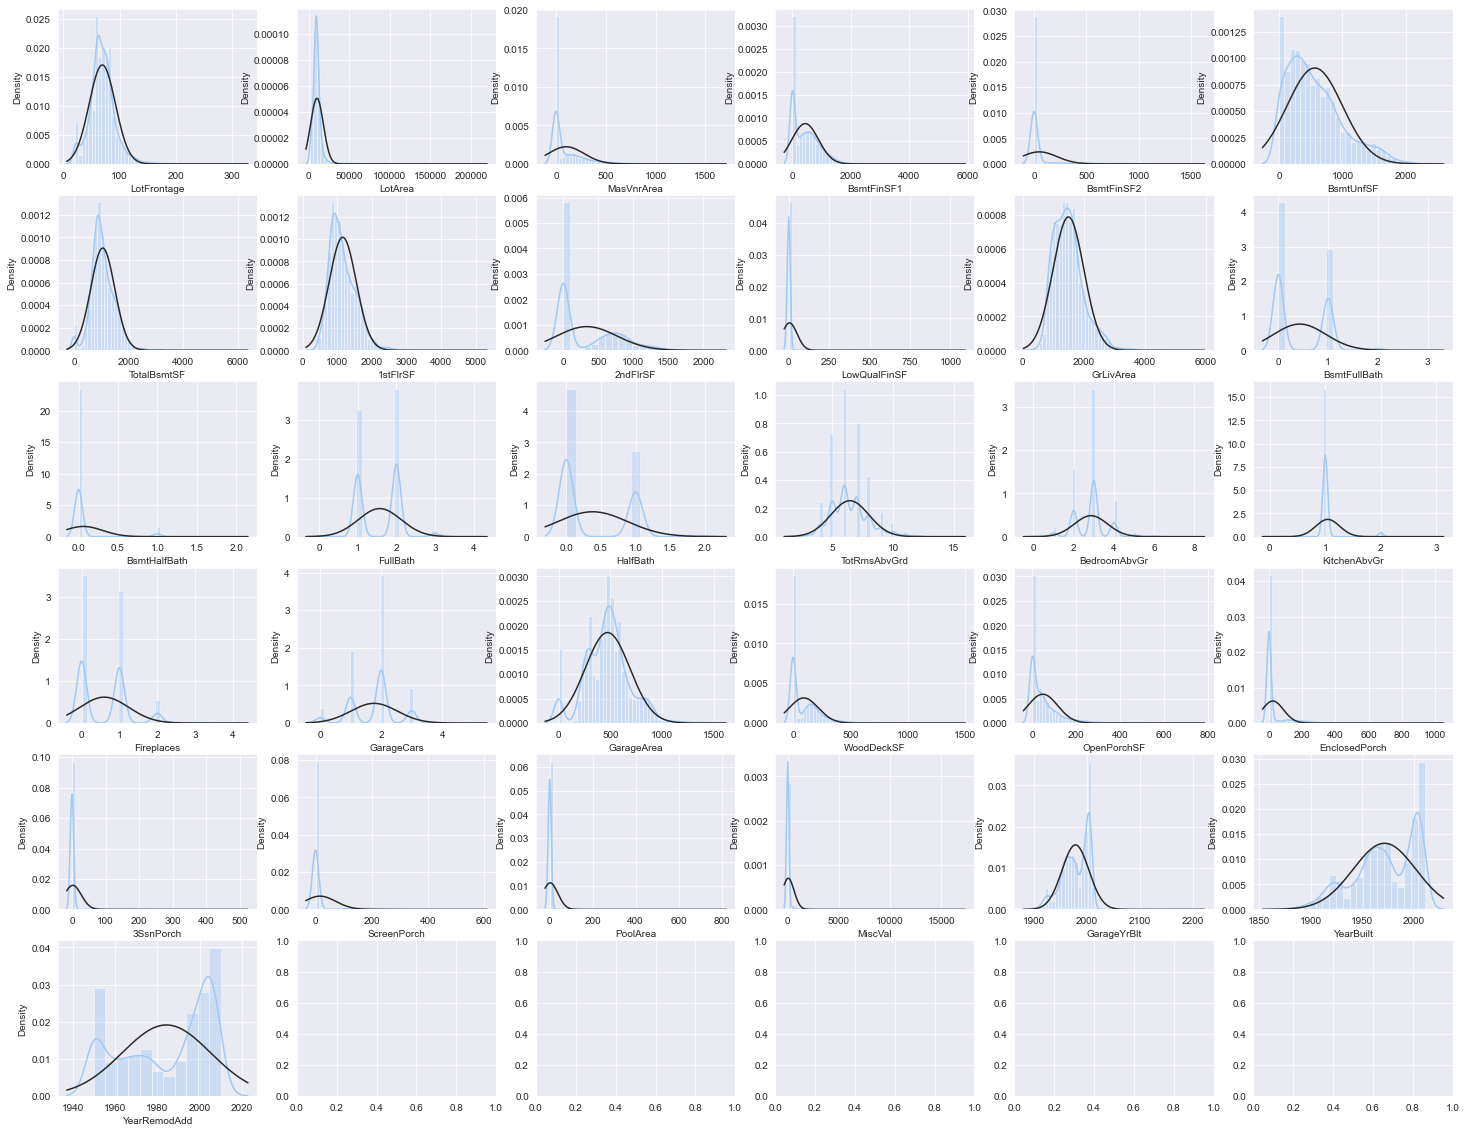

In [146]:
f, ax = plt.subplots(6, 6, figsize=(25, 20))
for i, c in enumerate(continue_vars):
    sns.distplot(X_total[c], fit=stats.norm, ax=ax[i//6, i%6])

연속형 변수의 히스토그램을 통해 알 수 있는 것:

1. LotFrontage, LotArea, BsmtUnfSF, TotalBsmtSF 등은 어느정도 정규분포를 따르지만 한쪽으로 쏠림(왜도가 큼) 현상이 있으므로 로그변환 or 박스콕스 변환을 해야한다.

2. MasVnrArea,  BsmtFinSF1, BsmtFinSF2, 2ndFlrSF 등은 특정 값(0)이 많고 그 외엔 어느정도 정규분포를 따른다. 0이 있으므로 로그변환 or 박스콕스 변환 시 +1을 해줘야 한다.

3. 3SsnPorch, ScreenPorch, PoolArea 등은 대부분 0을 갖는다. 이들은 있느냐 없느냐를 나타내는 범주형 변수를 추가할 수 있다.

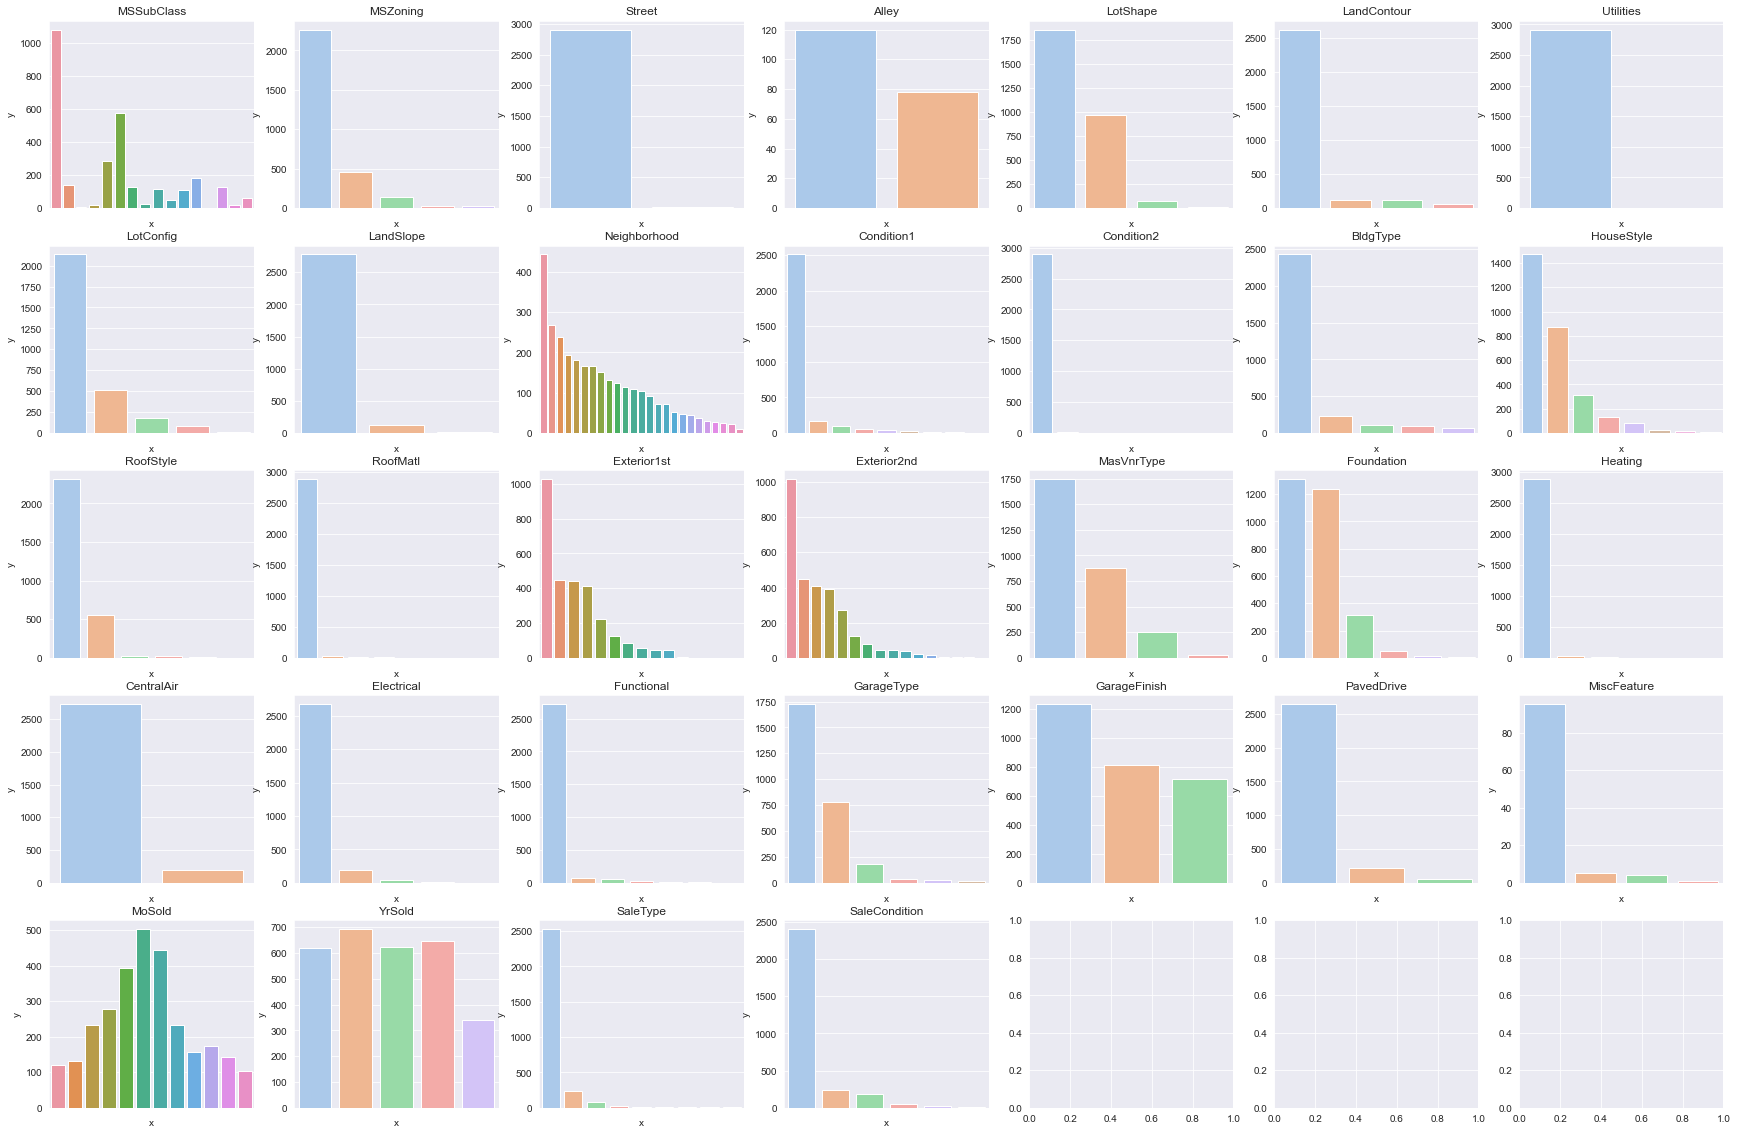

In [145]:
f, ax = plt.subplots(5, 7, figsize=(30, 20))
for i in range(32):
    tmp = X_total[nominal_vars].iloc[:,i].value_counts()
    tmp = pd.DataFrame([tmp.index, tmp.values], index=['x', 'y']).T
    g = sns.barplot(data=tmp, x='x', y='y', ax=ax[i//7, i%7])
    g.set(xticklabels=[])
    g.set(title=nominal_vars[i])

범주형 변수의 바차트를 통해 알아낸 사실:
1. Utilities, Condition2, RoofMatl, Heating 등은 극단적으로 한쪽으로 쏠림. 종속변수에 큰 영향을 주지 않는, 중요도가 떨어지는 변수.